# Plotting

We want to plot the statistics for pre-processing and post-processing.

In [1]:
# from GWMT import *
# import readMergeTree as rmt
# import os
# import networkx as nx
# from matplotlib import pyplot as plt

## Section 1. Plots for pre-processing settings

### Step 0. load the raw data for plotting statistics for pre-processing settings

In [2]:
# dates = ["20180501", "20180613", "20180618", "20180622", "20180623", "20180710", "20190506", 
#          "20190512", "20190531", "20190608", "20190613", "20190702", "20190810"]

# # dates = ["20180501", "20180623", "20190512"]

In [3]:
# # dataset choices: ["CPPin202308*", "*juelich"]\

# # CPPin202308*: typical ocean data

# # *juelich: typical land data
# # dataset = "20190512_juelich"

# def get_hrtime_by_filename(filename, return_hrtime=False):
#     fn1 = filename.replace(".txt", "").replace(".npy", "")
#     datetime = fn1.split("_")[0]
#     date, hrtime = datetime.split("t")
#     return hrtime

# value_list = []
# time_list = []

# for date in dates:
#     dataset = "{}_CE_additional.tar/array".format(date)
#     dataset_path = os.path.join("C:/Users/mingz/Desktop/ResearchProjects/GWMT-Cloud/CloudTracking/additional", dataset).replace("\\", "/")
    
#     files = os.listdir(dataset_path)

#     def endsWithRawNpy(s: str):
#         return s.endswith("_juelich.npy")

#     npy_files = list(filter(endsWithRawNpy, files))
# #         npy_files.sort(key=lambda x: key(x.split(".")[0].split("_")[0]))
#     npy_files.sort()
#     print(dataset_path, len(npy_files))

#     for file in npy_files:
#         values = np.load(os.path.join(dataset_path, file), allow_pickle=True)
#         time_list.append(get_hrtime_by_filename(file))
#         value_list.append(values)


### Plot 1 & 2. Number of clusters & area coverage percentage w.r.t. cluster sizes

Plot 1:
* x axis: cluster size
* y axis: number of clusters (from all time steps)
* curves: different superlevel set thresholds

Plot 2:
* x axis: cluster size
* y axis: area coverage percentage (from all time steps)
* curves: different superlevel set thresholds

In [4]:
# from scipy.ndimage import label as lbl
# import matplotlib as mpl
# from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# def is_sorted(lst):
#     return all(lst[i] <= lst[i + 1] for i in range(len(lst) - 1))

# def categorical_colormap(values, zero_background=True):
#     pastel = mpl.colormaps['Pastel1']
#     color_choices = pastel(np.linspace(0, 1, 9))
# #     color_choices = ["darkorange", "gold", "lawngreen", "lightseagreen"]

#     n_choices = len(color_choices)
#     N = len(values)
    
#     colors = []
#     for i in range(N + 1):
#         if i == 0 and zero_background:
#             colors.append("black")
#         else:
#             colors.append(color_choices[i % n_choices])
#     cmap = ListedColormap(colors)
#     return cmap

# # input: a 2D matrix for the scalar field values
# # output: the segment sizes
# def cluster_sizes(mat, thres):
#     structure = np.array([[1, 1, 1],
#                           [1, 1, 1],
#                           [1, 1, 1]])
    
#     values = copy.deepcopy(mat)
#     values[mat < thres] = 0
#     values[mat >= thres] = 1
    
#     # segments: 2D matrix of segmentations of connected components 
#     # n_features: the number of different segmentations
#     segments, n_features = lbl(values, structure)
    
#     # next, we count the number of elements for each segment
#     segment_vals, segment_sizes = np.unique(segments, return_counts=True)
#     if len(segment_sizes) <= 0:
#         raise ValueError("Invalid field. Check the value matrices.")
#     assert segment_vals[0] == 0
#     if len(segment_sizes) == 1:
#         raise ValueError("Error: All pixels are background.")
        
#     # saving the segmentation for debug purpose
# #     np.savetxt("segments_debug/segments_debug.txt", segments)
        
#     return segment_sizes[1:]

# # input: segment sizes
# # output: segment_size_unique, segment_size_counts (accumulated)
# def count_segment_size(segment_sizes, normalized=True):
#     total_count = len(segment_sizes) if normalized else 1
#     unique, counts = np.unique(segment_sizes, return_counts=True)
#     assert is_sorted(unique)
#     sum_counts = np.cumsum(counts)
    
#     return unique, sum_counts / total_count

# # input: segment sizes
# # output: segment_size_unique, segment_coverage (accumulated)
# def count_segment_coverage(segment_sizes, full_size, normalized=True):
#     unique, counts = np.unique(segment_sizes, return_counts=True)
#     assert is_sorted(unique)
    
#     unique_coverage = [i * j for i, j in zip(unique, counts)]
#     sum_counts = np.cumsum(unique_coverage)
    
#     return unique, sum_counts / (full_size if normalized else 1)

In [5]:
# time_period = {
# #     "morning": [0, 36],
#     "mid-day": [37, 108],
# #     "late afternoon": [109, 145]
# }

# superlevel_thres_dict = {
#     "morning": 9.0,
#     "mid-day": 10.0,
#     "late afternoon": 9.0
# }

# daytime = "mid-day"
# st_time, ed_time = time_period[daytime]

# threshold_choices = list(np.arange(3.0, 12.1, 1.0))

# segment_sizes_thres = []
# for thres in threshold_choices:
#     segment_sizes_all_times = []
#     for t in range(len(value_list)):
#         if t < st_time:
#             continue
#         if t > ed_time:
#             break
#         segment_sizes = cluster_sizes(value_list[t], thres)
#         segment_sizes_all_times.extend(segment_sizes)
#     segment_sizes_thres.append(segment_sizes_all_times)

In [6]:
# np.save("segment_sizes_thres_juelich_{}.npy".format(daytime), segment_sizes_thres)

In [7]:
# # Plot 1
# font = {
#     "family": "sans-serif",
#     "weight": "normal",
#     "size": 24
# }

# smallfont = {
#     "family": "sans-serif",
#     "weight": "normal",
#     "size": 16
# }

# plt.figure(figsize=(8, 6))
# sum_seg_accum_counts = []
# for i, thres in enumerate(threshold_choices):
#     sum_seg_accum_counts.append(len(segment_sizes_thres[i]))
#     segment_sizes, segment_accum_counts = count_segment_size(segment_sizes_thres[i], normalized=True)
#     print("Max component size: ", np.max(segment_sizes))
#     plt.plot(segment_sizes, segment_accum_counts, label=str(thres))

# # Full view
# # plt.xscale("log")
# # # plt.xlim([1, 1e2])
# # plt.ylim([0.25, 1.01])
# # plt.legend(prop=smallfont, ncol=2)

# # Zoom-in
# plt.xlim([0, 30])
# # plt.ylim([0.7, 0.85])
# plt.axvline(x=10, color='black', linestyle="--")
# plt.legend(prop=smallfont, ncol=2)

# plt.xticks(font=font)
# plt.yticks(font=font)
# plt.xlabel("Cloud area size (pixels)", font=font)
# plt.ylabel("Accumulated proportion of \ncloud numbers", font=smallfont)

# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(threshold_choices, sum_seg_accum_counts)
# plt.xlabel("Superlevel set threshold")
# plt.ylabel("Cloud population")
# plt.show()

In [8]:
# # Plot 2

# plt.figure(figsize=(8, 6))
# sum_segment_areas = []

# for i, thres in enumerate(threshold_choices):
#     sum_segment_area = np.sum(segment_sizes_thres[i])
#     sum_segment_areas.append(sum_segment_area)
#     segment_sizes, segment_accum_coverage = count_segment_coverage(segment_sizes_thres[i], sum_segment_area, normalized=True)
#     for check in range(len(segment_sizes)):
#         if segment_sizes[check] >= 1000:
#             print(thres, segment_sizes[check], segment_accum_coverage[check], sum_segment_area)
#             break
        
#     plt.plot(segment_sizes, segment_accum_coverage, label=str(thres))

# # Full view
# plt.xscale("log")
# # plt.xlim([1, 1e5])
# # plt.ylim([0.0, 1.01])
# plt.legend(prop=smallfont, ncol=2)

# # Zoom-in
# # plt.xlim([8, 16])
# # plt.ylim([0.0, 0.10])
# # plt.axvline(x=10, color='black', linestyle="--")
# # plt.legend(prop=smallfont, ncol=2)


# plt.xticks(font=font)
# plt.yticks(font=font)
# plt.xlabel("Cloud area size (pixels)", font=font)
# plt.ylabel("Accumulated proportion of \ncloud area size", font=smallfont)
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(threshold_choices, sum_segment_areas)
# plt.xlabel("Superlevel set threshold")
# plt.ylabel("Cloud coverage size (pixels)")
# plt.show()

In [9]:
# from scipy.ndimage import label
# value_thres = 0.5

# fig = plt.figure(figsize=(12, 6))
# for i in range(len(value_list)):
#     value = value_list[i]

#     region = np.zeros(value.shape)
#     region[value < value_thres] = 0
#     region[value >= value_thres] = 1

#     s = [[1,1,1],
#          [1,1,1],
#          [1,1,1]]

#     labels, num_features = label(region, s)
#     _, sizes = np.unique(labels, return_counts=True)

#     # we remove sizes[0], because it always refer to the size of the background
#     uniques, counts = np.unique(sizes[1:], return_counts=True)
#     region_tuples = [(region_size, region_cnts) for region_size, region_cnts in zip(uniques, counts)]
#     region_tuples.sort()

#     # we compute the y-value of the curve: number of regions
#     y_curr = len(sizes) - 1
#     ys = [y_curr]
#     xs = [0]
#     for region_size, region_cnts in region_tuples:
#         xs.append(region_size)
#         y_curr -= region_cnts
#         ys.append(y_curr)

#     plt.plot(xs, ys)

# fontsize = 14
# plt.title("threshold = {}".format(str(value_thres)))
# plt.ylabel("Cloud area population", fontsize=fontsize)
# plt.xlabel("Cloud area size", fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.xlim([0, 200])
# # plt.axvline(x=10, color="black", linestyle="--")
# plt.show()


In [10]:
# from scipy.ndimage import label
# import matplotlib.colors as colors
# from matplotlib import cm

# time_range = np.unique(time_list)
# heights_by_time = {}

# value_thres = 0.5

# for i in range(len(value_list)):
#     value = value_list[i]
#     tt = time_list[i]

#     region = np.zeros(value.shape)
#     region[value < value_thres] = 0
#     region[value >= value_thres] = 1

#     s = [[1,1,1],
#          [1,1,1],
#          [1,1,1]]

#     labels, num_features = label(region, s)
#     height_dict = {}

#     unique_labels = np.unique(labels)
#     for lb in unique_labels:
#         if lb == 0:
#             continue
#         height_dict[lb] = np.max(value[labels == lb])
#     heights = list(height_dict.values())
#     heights.sort()

#     # we compute the y-value of the curve: number of regions
#     if tt not in heights_by_time:
#         heights_by_time[tt] = heights
#     else:
#         heights_by_time[tt].extend(heights)
# #     plt.plot(heights, ys, color=newcolors[int(norm(tt) * 255)])

In [11]:
# cmap_name = "viridis"
# fig = plt.figure(figsize=(12, 10))
# norm = colors.Normalize(vmin=min(time_range), vmax=max(time_range), clip=True)
# puor = cm.get_cmap(cmap_name, 256)
# newcolors = puor(np.linspace(0, 1, 256))
# for tt in heights_by_time:
#     heights = heights_by_time[tt]
#     heights.sort()
#     ys = list(range(len(heights)))
#     plt.plot(heights, ys, color=newcolors[int(norm(tt) * 255)], alpha=0.6)
    
# fontsize = 14
# plt.ylabel("Accumulated cloud area population", fontsize=fontsize)
# plt.xlabel("Cloud area max value", fontsize=fontsize)
# plt.xticks(fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.xlim([0, 15])

# #     plt.axvline(x=5, color="black", linestyle="--")
# plt.show()

In [12]:
# import matplotlib as mpl
# plt.figure(figsize=(8, 0.5))
# cmap_vals =np.asarray(norm(list(heights_by_time.keys()))).reshape(1, -1)
# plt.imshow(cmap_vals, aspect='auto', cmap=mpl.colormaps[cmap_name])
# plt.yticks([])
# xtcks_loc = []
# xtcks_label = []
# for ti in range(len(time_range)):
#     if ti % 20 == 0:
#         xtcks_loc.append(ti)
#         xtcks_label.append(str(time_range[ti]).zfill(4))
# plt.xticks(xtcks_loc, xtcks_label)

## Section 2. Plots for tracking results

### Generating tracking results

We compute the matching based on matching scores.
We move the step to here to unify all kinds of output from three different approaches (ours, tobac, PyFLEXTRKR)

In [13]:
# dates = ["20230801", "20230802", "20230803", "20230804", "20230805", "20230806", "20230807",
#          "20230808", "20230809", "20230810", "20230811", "20230812", "20230813", "20230814",]
dates = ["20180501", "20180623", "20190512"]

In [14]:
techniques = ["pFGW-system", "pFGW-object", "PyFLEXTRKR", "tobac"]

time_period = {
#     "morning": [0, 36],
    "mid-day": [37, 108],
#     "late afternoon": [109, 145]
}

superlevel_thres_dict = {
    "morning": 9.0,
    "mid-day": 10.0,
    "late afternoon": 9.0
}

In [15]:
import pickle
from os.path import join as pjoin
import os

track_information = {}
dataset_strs = {}
alpha=0.2
nDates = len(dates)

for date in dates:
    for technique in techniques:
        for daytime in time_period:
            track_info_base_dir = "./track-info/"
            start_time, end_time = time_period[daytime]
            
            # name-persSimp-alpha
            dataset="20180501_juelich".replace("20180501", date)
            superlevel_thres = superlevel_thres_dict[daytime]
            
            if daytime != "late afternoon":
                dataset_s = "{}-0-{}-{}-{}-thres-{}".format(dataset, 
                                                              str(alpha) if "pFGW" in technique else "0", 
                                                              str(start_time), 
                                                              str(end_time), 
                                                              str(round(superlevel_thres, 1)))
            else:
                avails = os.listdir(pjoin(track_info_base_dir, technique))
                dataset_s = None
                for avail in avails:
                    if dataset in avail:
                        if "-{}-{}-".format(str(alpha) if technique == "pFGW" else "0", str(start_time)) in avail:
                            dataset_s = avail
                            break
                            
            print("Dataset String:", dataset_s)

            dataset_str = pjoin(technique, dataset_s)
            if (technique, daytime) not in dataset_strs:
                dataset_strs[(technique, daytime)] = [dataset_str]
            else:
                dataset_strs[(technique, daytime)].append(dataset_str)

            track_info_dir = pjoin(track_info_base_dir, dataset_str)

            centroids = clustered_sfs = matching_scores = None
            with open(pjoin(track_info_dir, "clustered_sf.pkl"), "rb") as infile:
                clustered_sfs = pickle.load(infile)
                infile.close()

            with open(pjoin(track_info_dir, "centroids.pkl"), "rb") as infile:
                centroids = pickle.load(infile)
                infile.close()

            with open(pjoin(track_info_dir, "matching_scores.pkl"), "rb") as infile:
                matching_scores = pickle.load(infile)
                infile.close()
            
            print(len(clustered_sfs), len(centroids), len(matching_scores))

            if (technique, daytime) not in track_information:
                track_information[(technique, daytime)] = [[clustered_sfs, centroids, matching_scores]]
            else:
                track_information[(technique, daytime)].append([clustered_sfs, centroids, matching_scores])

Dataset String: 20180501_juelich-0-0.2-37-108-thres-10.0
72 72 71
Dataset String: 20180501_juelich-0-0.2-37-108-thres-10.0
72 72 71
Dataset String: 20180501_juelich-0-0-37-108-thres-10.0
72 72 71
Dataset String: 20180501_juelich-0-0-37-108-thres-10.0
72 72 71
Dataset String: 20180623_juelich-0-0.2-37-108-thres-10.0
72 72 71
Dataset String: 20180623_juelich-0-0.2-37-108-thres-10.0
72 72 71
Dataset String: 20180623_juelich-0-0-37-108-thres-10.0
72 72 71
Dataset String: 20180623_juelich-0-0-37-108-thres-10.0
72 72 71
Dataset String: 20190512_juelich-0-0.2-37-108-thres-10.0
72 72 71
Dataset String: 20190512_juelich-0-0.2-37-108-thres-10.0
72 72 71
Dataset String: 20190512_juelich-0-0-37-108-thres-10.0
72 72 71
Dataset String: 20190512_juelich-0-0-37-108-thres-10.0
72 72 71


In [16]:
from postprocess_juelich import compute_one2one_matching, output_trajectories
import copy

for iDate in range(nDates):
    for technique in techniques:
        for daytime in time_period:
            print(technique)
            clustered_sfs = track_information[(technique, daytime)][iDate][0]
            matching_scores = track_information[(technique, daytime)][iDate][2]
            if "pFGW" in technique:
                cloud_id_mapping, durations = compute_one2one_matching(matching_scores, strategy="area-priority", clustered_sfs=clustered_sfs, oc_thres=1/10)
            else:
                cloud_id_mapping, durations = compute_one2one_matching(matching_scores, strategy="max-max")
            track_information[(technique, daytime)][iDate].extend([cloud_id_mapping, durations])

pFGW-system
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
pFGW-object
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
PyFLEXTRKR
tobac
pFGW-system
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
pFGW-object
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
PyFLEXTRKR
tobac
pFGW-system
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
pFGW-object
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sor

In [17]:
# from matplotlib import pyplot as plt
# import numpy as np

# scores = track_information[("pFGW", "mid-day")][0][2][0]
# print(np.max(scores), np.min(scores))
# clustered_sfs0 = track_information[("pFGW", "mid-day")][0][0][0]
# clustered_sfs1 = track_information[("pFGW", "mid-day")][0][0][1]

# NN, MM = scores.shape
            
# sortByArea_cur = [(np.sum(labels_cur == i), i) for i in range(NN)]
# sortByArea_next = [(np.sum(labels_next == i), i) for i in range(MM)]

# sortByArea_cur.sort(reverse=True)
# sortByArea_next.sort(reverse=True)

# row_scores = np.sum(scores, axis=1)
# col_scores = np.sum(scores, axis=0)

# matchings = np.zeros((NN, MM))
# for i in range(NN):
#     row = sortByArea_cur[i][1]
#     for j in range(MM):
#         col = sortByArea_next[j][1]
#         if col in checked_cols:
#             continue
            
#         # as long as there is valid assignment
#         if (scores[row][col] > 0) and ((scores[row, col] == np.max(scores[row, :])) or (scores[row, col] == np.max(scores[:, col])) or 
#             (scores[row, col] >= row_scores[row] * oc_thres) or (scores[row, col] >= col_scores[col] * oc_thres)):
#             matchings[row][col] = 
#             break

# scores[0][scores[0] > 0] = 1
# plt.figure(figsize=(16, 16))
# plt.imshow(scores[0])
# plt.colorbar()

In [18]:
# for iDate in range(nDates):
#     for technique in techniques:
#         for daytime in time_period:
#             if technique != "pFGW-system":
#                 continue
#             print(dates[iDate], technique, daytime)
#             dataset_str = dataset_strs[(technique, daytime)][iDate]
#             clustered_sfs, centroids, _, cloud_id_mapping, _ = track_information[(technique, daytime)][iDate]
#             output_trajectories(dataset_str, centroids, copy.deepcopy(clustered_sfs), cloud_id_mapping)

### Plot 3. Cloud system population histogram by time span (lifetime)

In [19]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# time gap size
gap_size = 5

# trajactories of pFGW-system: 30891
# cloud systems/objects of pFGW-system: 116184
# trajactories of pFGW-object: 32918
# cloud systems/objects of pFGW-object: 135830
# trajactories of PyFLEXTRKR: 92218
# cloud systems/objects of PyFLEXTRKR: 137777
# trajactories of tobac: 26721
# cloud systems/objects of tobac: 103402


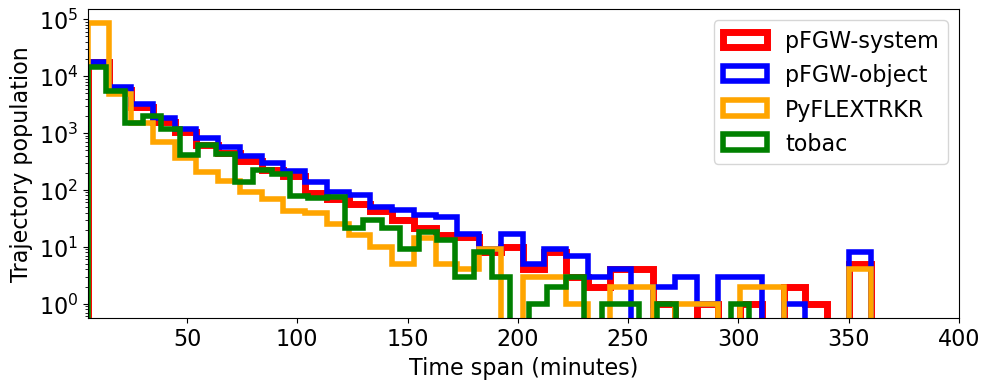

In [20]:
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 16
}
plt.figure(figsize=(10, 4))

colors_technique = {"pFGW-system": "red", "pFGW-object": "blue", "PyFLEXTRKR": "orange", "tobac": "green"}
linewidths_technique = {"pFGW-system": 5, "pFGW-object": 4, "PyFLEXTRKR": 4, "tobac": 4}

# unsimplified pFGW nSystems (CPPin) = 17178
for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        for daytime in time_period:
            tmp_duration = track_information[(technique, daytime)][iDate][4]
            all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations)
    
    print("# trajactories of {}:".format(technique), len(durations))
    print("# cloud systems/objects of {}:".format(technique), np.sum(durations))

    
for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        for daytime in time_period:
            tmp_duration = track_information[(technique, daytime)][iDate][4]
            all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    
    plt.hist(durations, bins=36, histtype="step", label=technique, 
             color=colors_technique[technique], linewidth=linewidths_technique[technique])

plt.yscale("log")
plt.xlabel("Time span (minutes)", font=font)
plt.ylabel("Trajectory population", font=font)

# plt.xlim([5, 200])
plt.xlim([5, 400])
plt.xticks(font=font)
plt.yticks(font=font)

plt.legend(prop=font)
plt.tight_layout()

plt.show()

### Plot 4. Bar plot for the evaluation statistics

* the median of trajectory durations 

* the mean of standard deviation of trajectory properties on tracks with duration > median
  - property 1. mean of cloud COD
  - property 2. standard deviation of cloud COD
  
* the root-mean-square error (RMSE) for the centroid locations of cloud systems on trajectories with duration > median

In [21]:
# statistical evaluation
labels = ["pFGW-system", "pFGW-object", "PyFLEXTRKR", "tobac"]
# labels = ["pFGW"] 
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 30
}

smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}

tinyfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 18
}

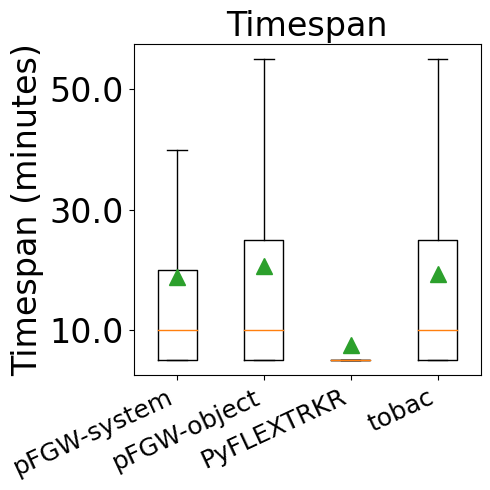

In [22]:
# Plot 4.1: median of trajectory durations
timespan_list = []

for label in labels:
    all_durations = []
    for iDate in range(nDates):
        for daytime in time_period:
            tmp_duration = track_information[(label, daytime)][iDate][4]
            all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    # durations = np.asarray(track_information[label][4]) * gap_size
    timespan_list.append(durations)
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(timespan_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Time span (minutes)", font=smallfont)

# plt.subplot(122)
plt.boxplot(timespan_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), labels, font=tinyfont, rotation=25, ha='right')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("Timespan", font=smallfont)
# plt.title("West of Africa")
# plt.xlabel("Strategy")
plt.ylabel("Timespan (minutes)", font=smallfont)
plt.tight_layout()
plt.show()


medians = {labels[i]: np.median(timespan_list[i]) / gap_size for i in range(len(labels))}

In [23]:
# Plot 4.2: the mean STD of cloud system/object property

def get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, median, measure="mean", debug=False):
    std_track_properties = []
    track_ids = np.unique(list(cloud_id_mapping.values()))
    track_instances = {}
    for key in cloud_id_mapping:
        time_step, seg_id = key
        val = cloud_id_mapping[key]
        if val not in track_instances:
            track_instances[val] = [(time_step, seg_id)]
        else:
            track_instances[val].append((time_step, seg_id))
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        track_property = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            seg_values = values[segmentation == seg_id]
            if len(seg_values) == 0:
                print(seg_id, np.unique(segmentation))
            if measure == "mean":
                prop = np.mean(seg_values)
            elif measure == "std":
                prop = np.std(seg_values)
            else:
                raise NotImplementedError
            track_property.append(prop)
        
        std_track_property = np.std(track_property)
        std_track_properties.append(std_track_property)
    
    return track_instances, std_track_properties

In [24]:
import readMergeTree as rmt
# Additional step: load scalar fields
dataset_base = "20180501_juelich"

region_lists = {}
value_lists = {}

for iDate in range(len(dates)):
    date = dates[iDate]
    for daytime in time_period:
        dataset = dataset_base.replace("20180501", date)
        dataset_path = os.path.join("data", dataset)

        region_list = []
        value_list = []
        for froot, di, files in os.walk(dataset_path):
            def key(s):
                try:
                    int(s)
                    return int(s)
                except ValueError:
                    return len(files) + 1

            def isSegmentation(s: str):
                return "segmentation" in s

            def endsWithTxt(s: str):
                return s.endswith("txt")

            def endsWithNpy(s: str):
                return s.endswith("npy")

            txt_files = list(filter(endsWithTxt, files))
            txt_files.sort(key=lambda x: key(x.split(".")[0].split("_")[-1]))

            for file in txt_files:
                regions, values = rmt.get_regions(os.path.join(dataset_path, file))
                region_list.extend(regions)
                value_list.extend(values)

        assert (len(region_list) == len(value_list))
        
        st_time, ed_time = time_period[daytime]

        region_lists[(iDate, daytime)] = region_list[st_time:ed_time+1]
        value_lists[(iDate, daytime)] = value_list[st_time:ed_time+1]


In [25]:
for each in medians:
    if medians[each] < 2:
        medians[each] = 2.0

print(medians)

{'pFGW-system': 2.0, 'pFGW-object': 2.0, 'PyFLEXTRKR': 2.0, 'tobac': 2.0}


In [26]:
# Step 1: we collect the trajectory information
measure = "mean"
track_instances_technique = {}
std_track_properties_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        for daytime in time_period:
            print("technique, date, daytime:", technique, dates[iDate], daytime)
            clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[(technique, daytime)][iDate][:5]

            # value_list has the original scalar field
            value_list = value_lists[(iDate, daytime)]
            print(len(value_list), len(clustered_sfs))
            assert len(value_list) == len(clustered_sfs)
            track_instances, std_track_properties = get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, medians[technique], measure, debug=technique=="tobac")
            track_instances_technique[(technique, daytime, iDate)] = track_instances
            std_track_properties_technique[(technique, daytime, iDate)] = std_track_properties

technique, date, daytime: pFGW-system 20180501 mid-day
72 72
technique, date, daytime: pFGW-system 20180623 mid-day
72 72
technique, date, daytime: pFGW-system 20190512 mid-day
72 72
technique, date, daytime: pFGW-object 20180501 mid-day
72 72
technique, date, daytime: pFGW-object 20180623 mid-day
72 72
technique, date, daytime: pFGW-object 20190512 mid-day
72 72
technique, date, daytime: PyFLEXTRKR 20180501 mid-day
72 72
technique, date, daytime: PyFLEXTRKR 20180623 mid-day
72 72
technique, date, daytime: PyFLEXTRKR 20190512 mid-day
72 72
technique, date, daytime: tobac 20180501 mid-day
72 72
technique, date, daytime: tobac 20180623 mid-day
72 72
technique, date, daytime: tobac 20190512 mid-day
72 72


In [27]:
# plt.figure(figsize=(3, 4))

# mean_std_track_trajectories_list = []# np.mean(std_track_properties_technique[(labels[i], j)]) for i in range(len(labels)) for j in range(nDates)]
# for label in labels:
#     std_track_properties = []
#     for iDate in range(nDates):
#         std_track_properties.extend(std_track_properties_technique[(label, iDate)])
#     print(std_track_properties)
#     mean_std_track_trajectories_list.append(np.asarray(std_track_properties))

# plt.bar(labels, mean_std_track_trajectories_list)
# # plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Mean of STD of COD{}".format(measure[0]))

mean: 1.559960771782646
median: 1.2308405668745126
mean: 1.601775747052205
median: 1.2618782728350393
mean: 1.5499845687022942
median: 1.1661428093295743
mean: 1.6250591306259528
median: 1.254979301669415


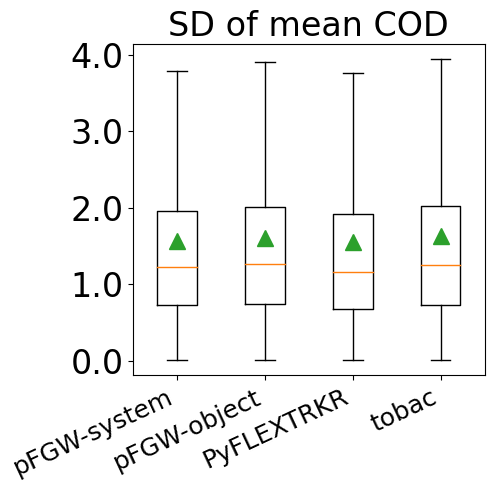

In [28]:
std_track_trajectories_list = []
for label in labels:
    std_track_properties = []
    for iDate in range(nDates):
        for daytime in time_period:
            std_track_properties.extend(std_track_properties_technique[(label, daytime, iDate)])
    std_track_trajectories_list.append(np.asarray(std_track_properties))
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(std_track_trajectories_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

# plt.subplot(122)
plt.boxplot(std_track_trajectories_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), labels, font=tinyfont, rotation=25, ha='right')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)

plt.title("SD of {} COD".format(measure), font=smallfont)
plt.tight_layout()

# plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

for ss in std_track_trajectories_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

In [29]:
def get_trajectory_line_fit(track_instances, centroids, median):
    root_mses = []
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        xs = []
        ys = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            xs.append(time_step)
            ys.append(centroids[time_step][seg_id])
        
        p, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
        root_mses.append(np.sum(np.sqrt(residuals)))
        
    return root_mses

In [30]:
std_track_linefit_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        for daytime in time_period:
            date = dates[iDate]
            print("technique:", technique)
            clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[(technique, daytime)][iDate][:5]
            track_instances = track_instances_technique[(technique, daytime, iDate)]

            value_list = value_lists[(iDate, daytime)]
            # value_list has the original scalar field
            assert len(value_list) == len(clustered_sfs)
            root_mses = get_trajectory_line_fit(track_instances, centroids, medians[technique])
            std_track_linefit_technique[(technique, daytime, iDate)] = root_mses

technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: pFGW-object
technique: pFGW-object
technique: pFGW-object
technique: PyFLEXTRKR
technique: PyFLEXTRKR
technique: PyFLEXTRKR
technique: tobac
technique: tobac
technique: tobac


mean: 4.010645918330924
median: 2.1872688908010076
mean: 4.063464010388043
median: 2.3874672772627132
mean: 2.0104938077726517
median: 0.6424844015942057
mean: 3.7823588565357187
median: 2.2453655975513303


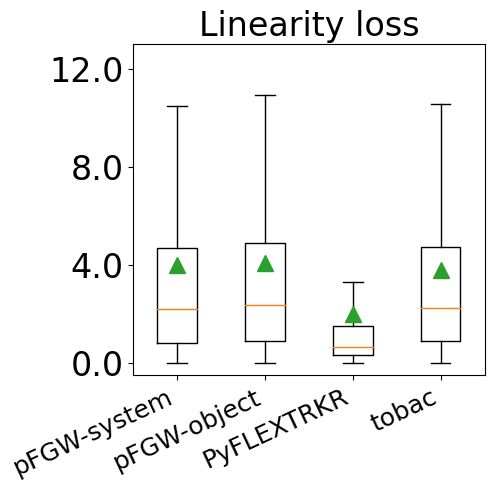

In [37]:
std_track_linefit_list = []
for label in labels:
    std_track_linefits = []
    for iDate in range(nDates):
        for daytime in time_period:
            std_track_linefits.extend(std_track_linefit_technique[(label, daytime, iDate)])
    std_track_linefit_list.append(np.asarray(std_track_linefits))
    
plt.figure(figsize=(5, 5))

# plt.subplot(121)
# plt.violinplot(std_track_linefit_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity error", font=smallfont)

# plt.subplot(122)

plt.boxplot(std_track_linefit_list, labels=labels, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(font=tinyfont, rotation=25, ha='right')

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, yticks_pos, font=smallfont)
for daytime in time_period:
    if daytime == 'mid-day':
        plt.ylim([-0.5, 13])

plt.title("Linearity loss", font=smallfont)
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity loss", font=smallfont)
plt.tight_layout()

for ss in std_track_linefit_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

### Section 3. Appendix plots for parameter justification

In [32]:
# # plot: max matched distance
# dist_table_path = "./binary-parameter-tuning/CPPin20230801_0percent"

# filename = "m_tuning_stats_alpha_0.2.csv"

# import pandas as pd
# dist_table = pd.read_csv(pjoin(dist_table_path, filename)).to_dict()

In [33]:
# dist_ms = dist_table['m']
# dist_mmds = dist_table["max_matched_distance"]

# def parse_list_str(st):
#     st = st.replace("[", "").replace("]", "").strip()
#     items = st.split(",")
#     lst = []
#     for item in items:
#         lst.append(float(item))
#     return lst

# lst_ms = []
# lst_mmds = []
# for key in dist_ms:
#     tmp_ms = parse_list_str(dist_ms[key])
#     tmp_mmds = parse_list_str(dist_mmds[key])
#     combined = list(zip(tmp_ms, tmp_mmds))
#     combined.sort()
#     ms = [i for i, j in combined]
#     mmds = [j for i, j in combined]
#     lst_ms.append(ms)
#     lst_mmds.append(mmds)

In [34]:
# plt.figure(figsize=(16, 8))
# for i in range(len(lst_ms)):
#     ms = lst_ms[i]
#     mmds = lst_mmds[i]
    
#     plt.plot(ms, mmds, label=str(i))
# plt.show()